# Plot normalized colored confusion matrices

## Setup

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
categories = ["fix-bugs", "new-features", "documentation", "non-functional"]

In [23]:
# https://stackoverflow.com/questions/58766561/scikit-learn-sklearn-confusion-matrix-plot-for-more-than-3-classes
def plot_confusion_matrix(cm,
                          classes=categories,
                          normalize=True,
                          title="Normalized confusion matrix",
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Plot

### DeepRelease (tab:titles-fasttext-metrics)

Normalized confusion matrix
[[0.65789474 0.15789474 0.02631579 0.15789474]
 [0.57718121 0.25503356 0.03355705 0.13422819]
 [0.21153846 0.07692308 0.36538462 0.34615385]
 [0.61842105 0.1622807  0.03070175 0.18859649]]


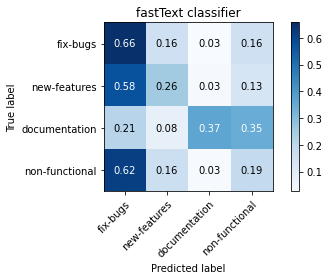

In [25]:
cm = np.array([
    [50 , 12 , 2 , 12],
    [86 , 38 , 5 , 20],
    [11 , 4 , 19 , 18],
    [141 , 37 , 7 , 43]
])

plot_confusion_matrix(cm, title="fastText classifier")

### Titles (Table 6.2, DistilBERT two thawed layers)

Normalized confusion matrix
[[0.86842105 0.03947368 0.02631579 0.06578947]
 [0.36912752 0.3557047  0.03355705 0.24161074]
 [0.15384615 0.01923077 0.65384615 0.17307692]
 [0.31578947 0.21052632 0.04385965 0.42982456]]


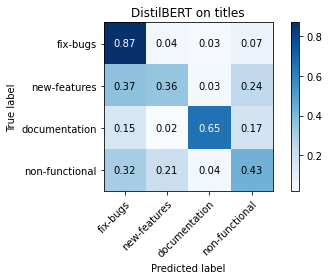

In [22]:
cm = np.array([
  [66, 3, 2, 5],
  [55, 53, 5, 36],
  [8, 1, 34, 9],
  [72, 48, 10, 98]
])

plot_confusion_matrix(cm, title="DistilBERT on titles")

### Extended text (Table 6.3, DistilBERT one thawed layer)

Normalized confusion matrix
[[0.82894737 0.03947368 0.         0.13157895]
 [0.15436242 0.48993289 0.         0.3557047 ]
 [0.09615385 0.01923077 0.71153846 0.17307692]
 [0.25438596 0.22807018 0.03947368 0.47807018]]


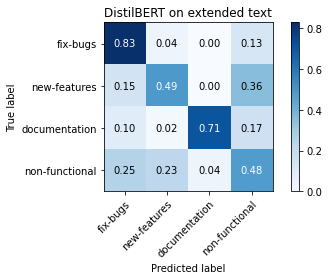

In [21]:
cm = np.array([
  [63, 3, 0, 10],
  [23, 73, 0, 53],
  [5, 1, 37, 9],
  [58, 52, 9, 109]
])

plot_confusion_matrix(cm, title="DistilBERT on extended text")

### Code diffs (Table 6.4, solid CodeBERTa on diffs)

Normalized confusion matrix
[[0.76315789 0.22368421 0.         0.01315789]
 [0.26174497 0.69127517 0.04026846 0.00671141]
 [0.32692308 0.19230769 0.26923077 0.21153846]
 [0.45614035 0.43421053 0.01754386 0.09210526]]


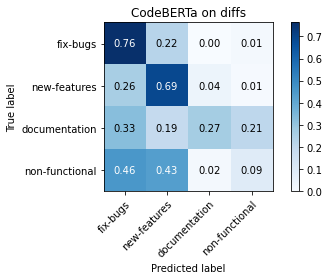

In [14]:
cm = np.array([
  [58, 17, 0, 1],
  [39, 103, 6, 1],
  [17, 10, 14, 11],
  [104, 99, 4, 21]
])

plot_confusion_matrix(cm, title="CodeBERTa on diffs")

### Ensemble classifier (Table 6.5, DistilBERT text data & CodeBERTa diff)

Normalized confusion matrix
[[0.88157895 0.03947368 0.         0.07894737]
 [0.11409396 0.67785235 0.00671141 0.20134228]
 [0.13461538 0.01923077 0.76923077 0.07692308]
 [0.24561404 0.33333333 0.02631579 0.39473684]]


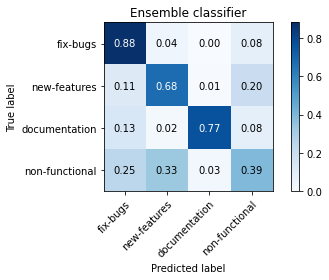

In [13]:
cm = np.array([
  [67, 3, 0, 6],
  [17, 101, 1, 30],
  [7, 1, 40, 4],
  [56, 76, 6, 90]
])

plot_confusion_matrix(cm, title="Ensemble classifier")